In [292]:
# physics 411 assignment 3 code for parts of Q1 and Q2,3

# import libraries:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from scipy.stats import norm
import datetime 
import matplotlib.dates as mdates
from scipy import interpolate
import matplotlib.ticker as plticker

#### Question 1. Sinusoids
1. The sum of a cosine and sine function of a given frequency f can be expressed as a single
   phase-shifted cosine or sine function:
   a cos(2πf t) + b sin(2πf t) = A cos(2πfc + θc) = B sin(2πfs + θs)
   For the following assume: a = 1; b = 0.3; 0 ≤ t ≤ 2/f
   * a) Find analytical expressions for A, fc, θc, B, fs, θs
   * b) Demonstrate your result with an example of a discrete time series with 1000 data points
      and f = 2Hz. I.e. calculate and plot v.s. t
      a cos(2πf t); b sin(2πf t); a cos(2πf t) + b sin(2πf t);
      A cos(2πfc + θc)
      B sin(2πfs + θs)
      Include your code.

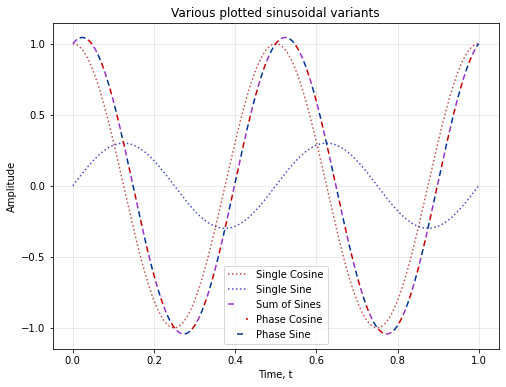

In [87]:
# now wish to show that the calculated result is true:

#using f = 2Hz with 1000 data points where 0<t<2/f:

# parameters:

aa = 1; bb = 0.3; ff = 2; tmin = 0; tmax = 2/ff; num_points = 1000

# time range:

tt = np.linspace(tmin, tmax, num_points)

# functions to plot:

a_cos = lambda t : aa*np.cos(2*np.pi*ff*t)

b_sin = lambda t : bb*np.sin(2*np.pi*ff*t)

sum_sines = lambda t : aa*np.cos(2*np.pi*ff*t) + bb*np.sin(2*np.pi*ff*t)

cos_phsh = lambda t : np.sqrt(aa**2 + bb**2) * np.cos(2*np.pi*ff*t + np.arctan(-bb/aa))

sin_phsh = lambda t : np.sqrt(aa**2 + bb**2) * np.sin(2*np.pi*ff*t + np.arctan(aa/bb))




fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
ax1.plot(tt, a_cos(tt), linestyle='dotted',color=[0.8,0.3,0.3], label="Single Cosine")
ax1.plot(tt, b_sin(tt), linestyle='dotted',color=[0.3,0.3,0.8], label="Single Sine")
ax1.plot(tt, sum_sines(tt), linestyle= (0,(4,14)), color=[0.6,0.2,0.8], label="Sum of Sines")
ax1.plot(tt, cos_phsh(tt), linestyle= (6,(4,14)), color=[0.8,0.,0.], label="Phase Cosine")
ax1.plot(tt, sin_phsh(tt), linestyle= (12,(4,14)), color=[0.,0.2,0.6], label="Phase Sine")

#ax1.plot(tt, sin_phsh(tt), color=[0.6,0.2,0.1])
#ax1.plot(tt, a_cos(tt), color=[0.6,0.2,0.7])
ax1.set_title("Various plotted sinusoidal variants")
ax1.set_xlabel(r"Time, t")
ax1.set_ylabel(r"Amplitude" )
ax1.grid(True, alpha=0.3)
ax1.legend()




#### Question 2. Interpolation
For the following use the zero-mean hour-resolution temperature data set $x_H = T − T{mean}$ for
the Station UVic Science Building (48.462 N, 236.691E ) using data from 1 July 2020 to 31
August 2020, only. Please include your code. You may want to use functions like interp1.m or
scipy.interpolate.interp1d and xcov.m.
1. a) Generate a new time series xsub with ∆t = 19.2h (i.e. 0.8 day) sampling rate, by interpolating the original data xH to the new sampling rate.

   b) Recreate the hour-sampled time series xrec from these sub-sampled data points xsub, using
    a cubic spline interpolation.

    c) Plot the original and the recreated time series for August, only (on the same plot).

   d) Calculate and plot the lagged-autocorrelation coefficient for all three time series, for lags
   up to 10 days.
    Discuss what are the dominant periods of the three time series (What are the similar features,
   what are different? Why?) 
   
   e) Repeat a) to d), but with ∆t = 7.2h (i.e. 0.3 day) sampling rate.

   f) What can you say about the ability to recover the original data, i.e. using interpolation
   to increase sampling rates?
   (12 points)

In [90]:
# first load in the data:

hourly_temp =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_temperature_hourly.dat").T

time = hourly_temp[0]
uvic_ht = hourly_temp[14]
# clean up header
uvic_ht = uvic_ht[3:]
time = time[3:]


In [93]:
print(len(uvic_ht))

57696


In [140]:
# time parameters:

time_2_1july20 = 442656 #hrs
time_2_31august20 = 444120  #hrs
length_of_sample = time_2_31august20 - time_2_1july20 #hrs
initial_time = 16801 # days

difference_1july20 = (time_2_1july20 - initial_time *24)

# final data set:

data_ht = uvic_ht[difference_1july20:difference_1july20 + length_of_sample]
time_f = time[difference_1july20:difference_1july20 + length_of_sample]
time_plot = time_f + initial_time


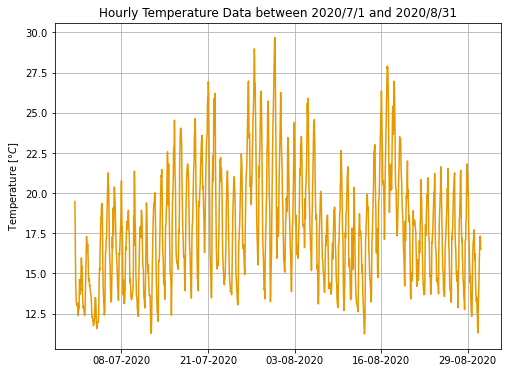

In [141]:
# plots the time series to ensure correct data:

ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot, data_ht, color=[0.9,0.6,0.])
ax1.set_title("Hourly Temperature Data between 2020/7/1 and 2020/8/31")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

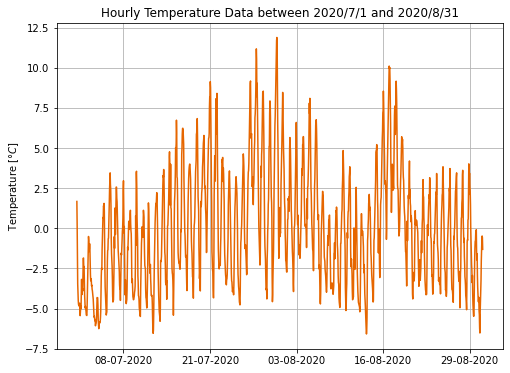

In [183]:
# now need to take zero-mean hourly resolved data:

mean_t = np.mean(data_ht)

data_zm = data_ht - mean_t

# plots it just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot, data_zm, color=[0.9,0.4,0.])
ax1.set_title("Hourly Temperature Data between 2020/7/1 and 2020/8/31")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

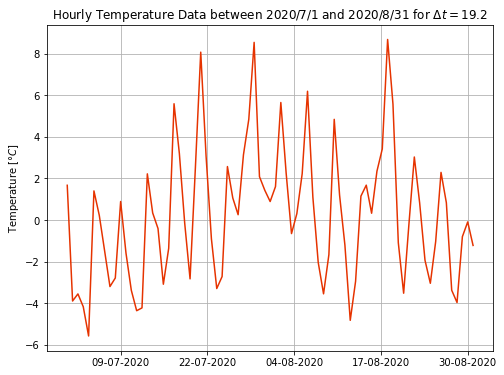

In [216]:
# to produce a data set with a lower sampling rate we now fit a interpolation
# object to the above data:

interp_ht = interpolate.interp1d(time_plot,data_zm, kind='cubic')

# now need list of sampled times:

delta_t = 19.2/24 # hrs

t19_plot = [((ii)*delta_t+time_2_1july20/24) for ii in range(int(length_of_sample/19.2)+1)]

# evaluates the interp function at all sampled points:

data_s19 = interp_ht(t19_plot)

# plots just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(t19_plot, data_s19, color=[0.9,0.2,0.])
ax1.set_title(r"Hourly Temperature Data between 2020/7/1 and 2020/8/31 for $\Delta t =19.2$ ")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

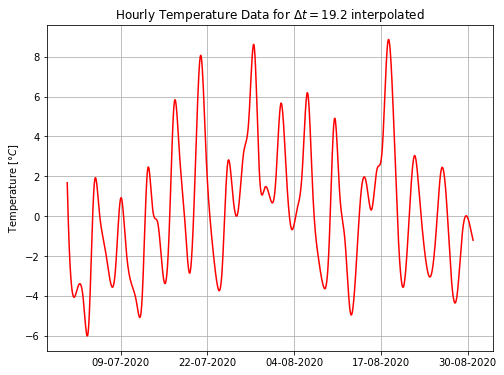

In [229]:
# now wish to apply a cubic spline interpolation on this data to smooth out 
# and recreate the previous time series:

interp_s19 = interpolate.interp1d(t19_plot,data_s19, kind='cubic')


# plots just to be safe:

# slight change in range is due to the sampling rate in the interpolation regime
# losing the interpolation range above the max integer value of delta_t:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(time_plot[:1460], interp_s19(time_plot[:1460]), color=[1,0.,0.])
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

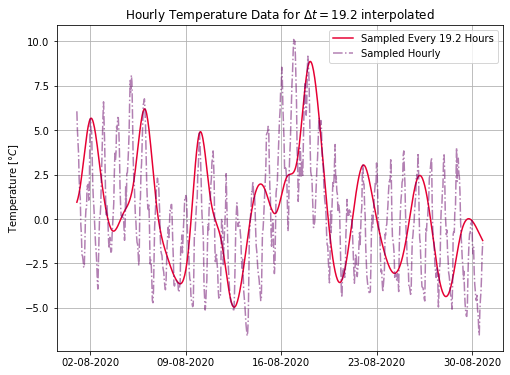

In [251]:
# now we wish to plot the above time series on the same plot for august only:

len_july = 31 * 24 #hours 

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.plot(time_plot[len_july:1460], interp_s19(time_plot[len_july:1460]), color=[0.9,0.,0.2], label="Sampled Every 19.2 Hours")
ax1.plot(time_plot[len_july:1460], data_zm[len_july:1460], '-.' ,color=[0.4,0.,0.4], alpha=0.5, label="Sampled Hourly")
ax1.set_title(r"Hourly Temperature Data for $\Delta t =19.2$ interpolated")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)
ax1.legend()

In [252]:
# now we wish to find the lagged autocorrelation for all three of the above time series:
# will simply use the function written for the last assignment as it works well:

def lag_correlation( X, taumax):
    '''
    t = time vector
    X = input time series data set
    tau = maximum lag
    
    '''
    
    # first need the mean of the data set:
    X_mean = np.mean(X)
    
    # also need the variance:
    X_var = (np.std(X, ddof=1))**2
    
    # need a list of desired lags:
    lags = [i for i in range(taumax+1)]
    
    # gotta subtract the mean of the data set from each value for later:
    
    X_sub_mean = [xx - X_mean for xx in X]
    
    # now if we loop through all possible lags and calculate the requisite value 
    # we will have the auto correlation function:
    
    corr_func = len(lags) * [0]
    for lag in lags:
        corr = 1
        
        if (lag >= 1):
            
            auto_cov = [X_sub_mean[lag:][ii]*X_sub_mean[:-lag][ii] for ii in range(len(X)-lag)]
            
            val = sum(auto_cov) / (len(X)-1)
            corr = val/X_var
        corr_func.append(corr)
        
    
    return [lags, corr_func]

In [253]:
# lags:

taumax = 10 * 24 # hours

# lagged autocorrelation for the three datasets:

lag_data = lag_correlation(data_zm, taumax)

lag_data_s19 = lag_correlation(data_s19, taumax)

lag_data_s19_int = lag_correlation(interp_s19(time_plot[len_july:1460]), taumax)


In [328]:
# manipulates data into plottable form:

lag_data_eff = lag_data[1][241:]
lag_s19_eff = lag_data_s19[1][241:]
lag_s19_int_eff  = lag_data_s19_int[1][241:]

lag_data_plot = list(reversed(lag_data_eff)) + lag_data_eff
lag_s19_plot = list(reversed(lag_s19_eff)) + lag_s19_eff
lag_s19_int_plot = list(reversed(lag_s19_int_eff)) + lag_s19_int_eff

# time lag:

neg_lag_data = [-1 * lag_data[0][-i] for i in lag_data[0]]
time_lag = neg_lag_data + lag_data[0]



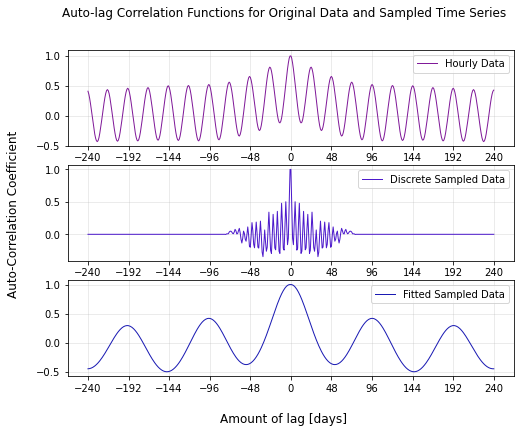

In [338]:
# now plots the lag correlation coefficients:


#Spacing between each line
intervals = 48

loc = plticker.MultipleLocator(intervals)

lag_data_eff = lag_data[1][241:]
lag_s19_eff = lag_data_s19[1][241:]
lag_s19_int_eff  = lag_data_s19_int[1][241:]


# plots the lag correlation data:
ff, (ax1,ax2,ax3) = plt.subplots(3, 1)
ff.set_figwidth(8)
ff.set_figheight(6)
ff.suptitle("Auto-lag Correlation Functions for Original Data and Sampled Time Series")
ff.supxlabel('Amount of lag [days]')
ff.supylabel('Auto-Correlation Coefficient')
# just plot positive time lags:
ax1.plot(time_lag[1:], lag_data_plot[1:], '-',color=[0.5,0.1,0.6], linewidth=1, label="Hourly Data")
ax2.plot(time_lag[1:], lag_s19_plot[1:], '-',color=[0.3,0.1,0.8], linewidth=1, label='Discrete Sampled Data')
ax3.plot(time_lag[1:], lag_s19_int_plot[1:], '-',color=[0.1,0.1,0.7], linewidth=1, label='Fitted Sampled Data')

ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_major_locator(loc)

ax1.set_ylim(-0.5,1.1)
ax1.grid(which="major",alpha=0.3)
ax2.grid(which="major",alpha=0.3)
ax3.grid(which="major",alpha=0.3)
ax1.xaxis.set_major_locator(loc)
ax2.xaxis.set_major_locator(loc)
ax3.xaxis.set_major_locator(loc)
ax1.legend()
ax2.legend()
ax3.legend()



Each of the three time series all exhibit quite different dominant periods. As expected, the hourly sampled time series has a very smooth autocorrelation function with a regular period of what appears to be exactly 24 hours. Since this time series is adequately sampled, we would expect daily periodicity in the auto-correlation function which is seen here. It also has a non-linear decay in envelope amplitude which seems to settle after lags greater than 4 or 5 days. What is more interesting are the other two correlation functions. The middle, discrete data set is only sampled 76 times, and as such is much more erratic when compared to the previous one. Since the sampling rate of 19.2 hours is not a nice fraction of a day, the time of day sampled is too unpredictable to resolve any small correlations. We entirely lose daily correlation in this set with a decisive reduction in the envelope away from zero. If the sampling started at another time of day rather than t=0 like we have done here, it would be expected that this data set would have a very different auto-correlation function. Near zero, there is a small range where a period of about 5 hours appears. For the final time-series, the fit on the data points from before results in a much smoother auto-correlation. It appears to have a very similar envelope decay to that of the hourly sampled data but with a much larger period. The period here is on the order of 4 days. As 19.2 * 5 is simply 96 hours (or 4 days) it makes sense that a period appears at this point. It is a remnant of the daily period coming through in this function. Our data, in this case, is undersampled as it cannot resolve the most dominant period in the well-sampled data. 

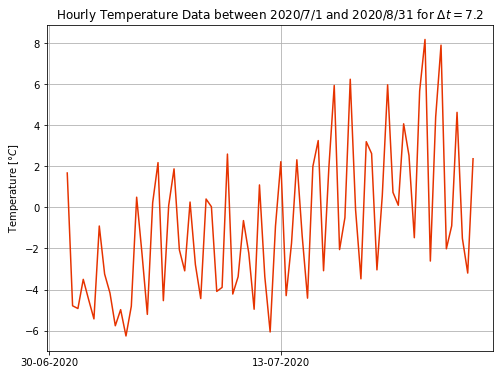

In [340]:
# we now wish to repeat the above analysis but for a delta_t = 7.2 hrs:

# to produce a data set with a lower sampling rate we now fit a interpolation
# object to the above data:

interp_ht = interpolate.interp1d(time_plot,data_zm, kind='cubic')

# now need list of sampled times:

delta_t = 7.2/24 # hrs

t19_plot = [((ii)*delta_t+time_2_1july20/24) for ii in range(int(length_of_sample/19.2)+1)]

# evaluates the interp function at all sampled points:

data_s19 = interp_ht(t19_plot)

# plots just to be safe:

fig, (ax1) = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=13))
ax1.plot(t19_plot, data_s19, color=[0.9,0.2,0.])
ax1.set_title(r"Hourly Temperature Data between 2020/7/1 and 2020/8/31 for $\Delta t =7.2$ ")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)







#### Question 3. Fourier Series of a square wave

1. Calculate the exponential Fourier series $\hat{x}$(t) of following signal:
x(t) = (
−1, −
T
2 < t < 0
+1, 0 ≤ t < T
2
, x(t + nT) = x(t)
• Determine the Fourier coefficients Sm (show your work, i.e. some intermediate steps)
• Plot ˆx(t) in the interval −3T/2 ≤ t ≤ 3T/2 for 1, 2, 5, 10, 100 terms, and for x(t).
• Plot the power spectrum of ˆx(t) for a record length 100 T and a sampling rate ∆t =
T/200. (Don’t include confidence limits).
a) for ˆx(t) based on 5 terms
b) for ˆx(t) based on 100 terms.